# Final Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [1]:
# Read in the customer data
import pandas as pd

customers = pd.read_csv('../Data/maven_music_customers.csv')
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [2]:
# Read in the listening history
listen = pd.read_excel('../Data/maven_music_listening_history.xlsx')
listen.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [3]:
# Hint: Where might you find listening history data beyond the ID's?
# -> Check other spreadsheets in the excel

In [4]:
# Read in the audio data
audioData = pd.read_excel('../Data/maven_music_listening_history.xlsx',sheet_name=1)
audioData.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [5]:
# Read in the session data
session = pd.read_excel('../Data/maven_music_listening_history.xlsx',sheet_name=2)
session.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [6]:
# Check the data types
# Have incorrect data types
customers.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [7]:
# Have correct data types
listen.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [8]:
# Have correct data types
audioData.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [9]:
# Have correct data types
session.dtypes

Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

In [10]:
# Convert objects to numeric and datetime fields

# Changing Member since to date time column
customers['Member Since'] = pd.to_datetime(customers['Member Since'])

In [11]:
# Changing Cancellation date to date time column
customers['Cancellation Date'] = pd.to_datetime(customers['Cancellation Date'])

In [12]:
# Changing Subscription Rate to numeric column
customers['Subscription Rate'] = pd.to_numeric(customers['Subscription Rate'].astype('str').str.replace('$',''))

/tmp/ipykernel_7723/758748107.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  customers['Subscription Rate'] = pd.to_numeric(customers['Subscription Rate'].astype('str').str.replace('$',''))


### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

In [13]:
customers.sample(10)

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
28,7581,Lyric Keys,Email: keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-03
16,6406,Beatrice Sharp,Email: beats.by.beatrice@email.com,2023-04-08,Basic (Ads),2.99,NaN,NaT
19,6588,Harmony Bass,Email: bass.harmony@email.com,2023-04-16,Basic (Ads),2.99,NaN,2023-06-01
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,NaN,NaT
22,6824,Greta Groove,Email: groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,NaN,NaT
26,7401,Reed Murphy,Email: murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01
20,6821,Reed Flat,Email: flat.tunes@email.edu,2023-04-24,Basic (Ads),2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
24,7158,Harmony Wallace,Email: wallace.harmony@email.com,2023-05-07,Basic (Ads),2.99,NaN,NaT


#### i. Missing Data

In [14]:
# Look for NaN values in the data
customers.isna().sum()

Customer ID           0
Customer Name         0
Email                 0
Member Since          0
Subscription Plan     5
Subscription Rate     0
Discount?            23
Cancellation Date    17
dtype: int64

In [15]:
listen.isna().sum()

Customer ID    0
Session ID     0
Audio Order    0
Audio ID       0
Audio Type     0
dtype: int64

In [16]:
audioData.isna().sum()

ID            0
Name          0
Genre         0
Popularity    0
dtype: int64

In [17]:
session.isna().sum()

Session ID             0
Session Log In Time    0
dtype: int64

In [18]:
# Resolving the missing data in the customers dataset
# Checking the subscription plan - all their subscription rate is 2.99
customers[customers['Subscription Plan'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,NaN,NaT


In [19]:
# Filling every null value in Subscription plan with Basics(Ads)
import numpy as np

customers['Subscription Plan'] = np.where(customers['Subscription Plan'].isna(),'Basic (Ads)',customers['Subscription Plan'])

print('Filled')

Filled


In [20]:
# Checking the discount? column - all 2.99 Subscription plan are Basic(Ads)
customers[customers['Discount?'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,NaN,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,NaN,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,NaN,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,NaN,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,NaN,NaT


In [21]:
# Checking the other responses of the Discount? column
customers['Discount?'].value_counts()

Yes    7
Name: Discount?, dtype: int64

In [22]:
# Filling all NaN values in the Discount? column with No

customers['Discount?'] = np.where(customers['Discount?'].isna(),'No',customers['Discount?'])

print("Filled")

Filled


#### ii. Inconsistent Text & Typos

In [23]:
# Look for inconsistent text & typos - need to be examined
customers.describe()

,Customer ID,Subscription Rate
count,30.000000,30.000000
mean,6276.333333,8.556667
std,814.255587,17.517840
min,5001.000000,2.990000
25%,5759.500000,2.990000
50%,6196.000000,2.990000
75%,6823.500000,7.990000
max,7583.000000,99.990000


In [24]:
# Looks there is a typo on 99.9 instead of 9.99
customers[customers['Subscription Rate'] > 2.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,No,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,No,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,No,NaT
12,6029,Chord Campbell,Email: campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,No,2023-06-02
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,No,NaT
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,No,2023-06-02
21,6822,Kiki Keys,Email: kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,Yes,NaT
22,6824,Greta Groove,Email: groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02
23,7087,Harmony Heart,Email: heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02
25,7224,Melody Fitzgerald,Email: fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01


In [25]:
# Correcting the typos
customers['Subscription Rate'] = np.where(customers['Subscription Rate'] > 9.99,9.99,customers['Subscription Rate'])

print('Done')

Done


In [26]:
# audio - looks good
listen.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [27]:
# audio - need to be examined
audioData.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [28]:
# There is inconsistent text - Pop and Pop Music which should be the same
audioData.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [29]:
# Checking the different categories in the Genre column
audioData.Genre.value_counts()

Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: Genre, dtype: int64

In [30]:
# using mapping to correct text consistent
Genre_type = {
    'Pop' : 'Pop',
    'Pop Music' : 'Pop',
    'Hip Hop' : 'Hip Hop',
    'Comedy' : 'Comedy',
    'Country' : 'Country',
    'Jazz' : 'Jazz',
    'True Crime' : 'True Crime'
}

audioData['Genre'] = audioData.Genre.map(Genre_type)

In [31]:
# Session - looks good
session.describe()

,Session ID
count,90.000000
mean,105619.788889
std,3616.208569
min,100520.000000
25%,102149.000000
50%,105390.500000
75%,109658.250000
max,111333.000000


#### iii. Duplicate Rows

In [32]:
customers[customers.duplicated]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


In [33]:
# Look for duplicate rows - No duplicate rows
listen[listen.duplicated]

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [34]:
audioData[audioData.duplicated()]

,ID,Name,Genre,Popularity


In [35]:
session[session.duplicated()]

,Session ID,Session Log In Time


#### iv. Outliers

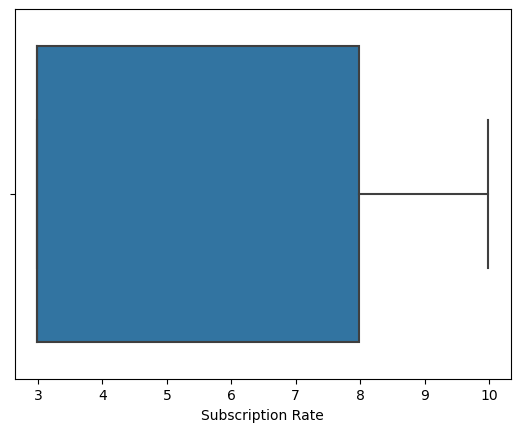

In [36]:
# Look for outliers
# We have an outlier

import seaborn as sns

sns.boxplot(x=customers['Subscription Rate']);

In [37]:
# We can also check for outliers using the .describe method
customers.describe()

,Customer ID,Subscription Rate
count,30.000000,30.000000
mean,6276.333333,5.556667
std,814.255587,3.058998
min,5001.000000,2.990000
25%,5759.500000,2.990000
50%,6196.000000,2.990000
75%,6823.500000,7.990000
max,7583.000000,9.990000


In [38]:
listen.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [39]:
audioData.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [40]:
session.describe()

,Session ID
count,90.000000
mean,105619.788889
std,3616.208569
min,100520.000000
25%,102149.000000
50%,105390.500000
75%,109658.250000
max,111333.000000


### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [41]:
# Create a 'Cancelled' column
customers['Cancelled'] = np.where(customers['Cancellation Date'].notna(),1,0)
print('column created')

column created


In [42]:
# Create an updated 'Email' column without the Email: portion
customers['Email'] = customers.Email.str[6:]

In [43]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,NaT,0


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [44]:
# How long were customers members before they cancelled?
cancelled = customers[customers.Cancelled == 1]
cancelled

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,No,2023-06-03,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,No,2023-06-02,1
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,No,2023-06-02,1
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,No,2023-06-01,1
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),9.99,No,2023-06-02,1
19,6588,Harmony Bass,bass.harmony@email.com,2023-04-16,Basic (Ads),2.99,No,2023-06-01,1
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01,1


In [73]:
# How long were customers members before they cancelled - find the mean of the difference
# About 1.5 months .. this seems to be less we might need to gather more data

(cancelled['Cancellation Date'] - cancelled['Member Since']).mean()

Timedelta('46 days 07:23:04.615384615')

In [46]:
cancelled['Days Apart'] = cancelled['Cancellation Date'] - cancelled['Member Since']
cancelled.head()

/tmp/ipykernel_7723/4046992737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled['Days Apart'] = cancelled['Cancellation Date'] - cancelled['Member Since']


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled,Days Apart
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1,80 days
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,No,2023-06-03,1,75 days
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,No,2023-06-02,1,72 days
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,No,2023-06-02,1,65 days
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,No,2023-06-01,1,61 days


In [54]:
# Calculate the Cancellation rate for those who had a discount
withDiscount = cancelled[cancelled['Discount?'] == 'Yes']
withDiscount

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled,Days Apart,Current Days,Cancellation Rate
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02,1,32 days,61 days,52.459016
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,Yes,2023-06-02,1,32 days,61 days,52.459016
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01,1,24 days,54 days,44.444444
26,7401,Reed Murphy,murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,Yes,2023-06-01,1,24 days,54 days,44.444444
28,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-03,1,18 days,46 days,39.130435
29,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium (No Ads),7.99,Yes,2023-06-01,1,16 days,46 days,34.782609


In [74]:
# Cancellation rate for those who had a discount
withDiscount.Cancelled.sum() / withDiscount.Cancelled.count()

1.0

In [48]:
# Assuming today would be the base of the time that would make it 100% being on the service
current_date = pd.to_datetime('2023/07/01')
current_date

Timestamp('2023-07-01 00:00:00')

In [49]:
# Creating a colum for current Days
cancelled['Current Days'] = current_date - cancelled['Member Since']
cancelled.head()

/tmp/ipykernel_7723/1876444897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled['Current Days'] = current_date - cancelled['Member Since']


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled,Days Apart,Current Days
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1,80 days,110 days
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,No,2023-06-03,1,75 days,103 days
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,No,2023-06-02,1,72 days,101 days
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,No,2023-06-02,1,65 days,94 days
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,No,2023-06-01,1,61 days,91 days


In [50]:
# Calculating the rate
cancelled['Cancellation Rate'] = cancelled['Days Apart'] / cancelled['Current Days'] * 100
cancelled.head()

/tmp/ipykernel_7723/3772028562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled['Cancellation Rate'] = cancelled['Days Apart'] / cancelled['Current Days'] * 100


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled,Days Apart,Current Days,Cancellation Rate
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1,80 days,110 days,72.727273
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,No,2023-06-03,1,75 days,103 days,72.815534
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,No,2023-06-02,1,72 days,101 days,71.287129
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,No,2023-06-02,1,65 days,94 days,69.148936
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,No,2023-06-01,1,61 days,91 days,67.032967


In [75]:
# Calculate the Cancellation rate for those who did not have a discount
withoutDiscount = cancelled[cancelled['Discount?'] == 'No']
withoutDiscount

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled,Days Apart,Current Days,Cancellation Rate
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1,80 days,110 days,72.727273
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,No,2023-06-03,1,75 days,103 days,72.815534
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,No,2023-06-02,1,72 days,101 days,71.287129
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,No,2023-06-02,1,65 days,94 days,69.148936
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,No,2023-06-01,1,61 days,91 days,67.032967
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),9.99,No,2023-06-02,1,57 days,86 days,66.279070
19,6588,Harmony Bass,bass.harmony@email.com,2023-04-16,Basic (Ads),2.99,No,2023-06-01,1,46 days,76 days,60.526316


In [76]:
# Cancellation rate of those who had no discount
withoutDiscount.Cancelled.sum()/ withDiscount.Cancelled.count()

1.1666666666666667

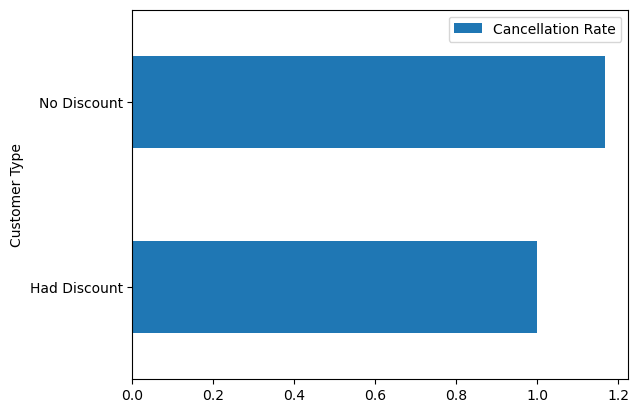

In [78]:
# Visualize the cancellation rate for those with a discount vs those without a discount
pd.DataFrame([['Had Discount',1.0],
            ['No Discount',1.1666666666666667]],
            columns=['Customer Type','Cancellation Rate']).plot.barh(x='Customer Type',y='Cancellation Rate',);

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [57]:
audioData.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52


In [58]:
# renaming the ID
audioData = audioData.rename(columns={'ID' : 'old_ID'})
audioData

,old_ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52
5,Song-106,My Old Dog and My True Love,Country,23
6,Song-107,Dirt Road Romance,Country,30
7,Song-108,Chase the Dream,Hip Hop,4
8,Song-109,Rise Above,Hip Hop,9
9,Song-110,Boss Moves,Hip Hop,28


In [59]:
# Split the ID in the audio data so the column can be joined with other tables
audio_id = audioData.old_ID.str.split('-')
audio_id

0        [Song, 101]
1        [Song, 102]
2        [Song, 103]
3        [Song, 104]
4        [Song, 105]
5        [Song, 106]
6        [Song, 107]
7        [Song, 108]
8        [Song, 109]
9        [Song, 110]
10       [Song, 111]
11       [Song, 112]
12    [Podcast, 201]
13    [Podcast, 202]
14    [Podcast, 203]
15    [Podcast, 204]
16    [Podcast, 205]
Name: old_ID, dtype: object

In [60]:
# turning the audio_id series to a dataframe
audioID = pd.DataFrame(audio_id.to_list(),columns=['Audio type','ID'])
audioID

,Audio type,ID
0,Song,101
1,Song,102
2,Song,103
3,Song,104
4,Song,105
5,Song,106
6,Song,107
7,Song,108
8,Song,109
9,Song,110


In [61]:
# Hint: Check the data type of Audio ID in the audio table
audioID.ID = pd.to_numeric(audioID.ID )
audioID.ID.dtypes

dtype('int64')

In [62]:
# Merging the audioData with the audioId
data = pd.concat([audioData,audioID],axis=1)
data

,old_ID,Name,Genre,Popularity,Audio type,ID
0,Song-101,Dance All Night,Pop,1,Song,101
1,Song-102,Unbreakable Beat,Pop,2,Song,102
2,Song-103,Sunset Boulevard,Pop,5,Song,103
3,Song-104,Glowing Hearts,Pop,10,Song,104
4,Song-105,Pop Rocks,Pop,52,Song,105
5,Song-106,My Old Dog and My True Love,Country,23,Song,106
6,Song-107,Dirt Road Romance,Country,30,Song,107
7,Song-108,Chase the Dream,Hip Hop,4,Song,108
8,Song-109,Rise Above,Hip Hop,9,Song,109
9,Song-110,Boss Moves,Hip Hop,28,Song,110


In [63]:
# Dropping the old ID
data.drop(columns={'old_ID'},inplace= True)

In [64]:
# Renaming some columns in the audio data to match those in listen data
new_data = data.rename(columns={
    'ID':'Audio ID',
    'Audio type':'Audio Type'
})
new_data

,Name,Genre,Popularity,Audio Type,Audio ID
0,Dance All Night,Pop,1,Song,101
1,Unbreakable Beat,Pop,2,Song,102
2,Sunset Boulevard,Pop,5,Song,103
3,Glowing Hearts,Pop,10,Song,104
4,Pop Rocks,Pop,52,Song,105
5,My Old Dog and My True Love,Country,23,Song,106
6,Dirt Road Romance,Country,30,Song,107
7,Chase the Dream,Hip Hop,4,Song,108
8,Rise Above,Hip Hop,9,Song,109
9,Boss Moves,Hip Hop,28,Song,110


In [65]:
# Joining the audio tables and the listening table
df = listen.merge(new_data,how='left',left_on=['Audio ID','Audio Type'],right_on=['Audio ID','Audio Type'])
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Name,Genre,Popularity
0,5001,100520,1,101,Song,Dance All Night,Pop,1.0
1,5001,100520,2,102,Song,Unbreakable Beat,Pop,2.0
2,5001,100520,3,103,Song,Sunset Boulevard,Pop,5.0
3,5001,100520,4,104,Song,Glowing Hearts,Pop,10.0
4,5001,100520,5,105,Song,Pop Rocks,Pop,52.0


In [66]:
df.dtypes

Customer ID      int64
Session ID       int64
Audio Order      int64
Audio ID         int64
Audio Type      object
Name            object
Genre           object
Popularity     float64
dtype: object

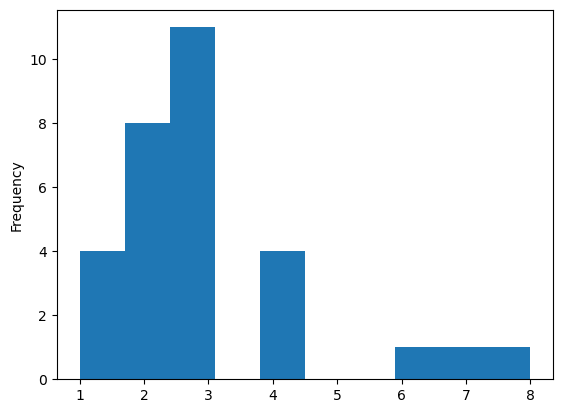

In [80]:
# The number of listening sessions that each customer had in the past 3 months
df.groupby('Customer ID')['Session ID'].nunique().sort_values(ascending=False).plot.hist();

In [68]:
# The most popular genres that customers listened to
df.groupby('Genre')['Customer ID'].count().sort_values(ascending=False)

Genre
Pop           259
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: Customer ID, dtype: int64

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [82]:
# Create a dataframe ready for modeling
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Name,Genre,Popularity
0,5001,100520,1,101,Song,Dance All Night,Pop,1.0
1,5001,100520,2,102,Song,Unbreakable Beat,Pop,2.0
2,5001,100520,3,103,Song,Sunset Boulevard,Pop,5.0
3,5001,100520,4,104,Song,Glowing Hearts,Pop,10.0
4,5001,100520,5,105,Song,Pop Rocks,Pop,52.0


In [83]:
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,No,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,No,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,No,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,No,NaT,0


In [89]:
# merging the customers and the df dataFrames
data = customers.merge(df,how='left',on='Customer ID')
data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled,Session ID,Audio Order,Audio ID,Audio Type,Name,Genre,Popularity
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT,0,100520,1,101,Song,Dance All Night,Pop,1.0
1,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT,0,100520,2,102,Song,Unbreakable Beat,Pop,2.0
2,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT,0,100520,3,103,Song,Sunset Boulevard,Pop,5.0
3,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT,0,100520,4,104,Song,Glowing Hearts,Pop,10.0
4,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,No,NaT,0,100520,5,105,Song,Pop Rocks,Pop,52.0


In [90]:
# Changing the Discount column to numeric
data['Discount?'] = np.where(data['Discount?'] == 'Yes',1,0)
data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled,Session ID,Audio Order,Audio ID,Audio Type,Name,Genre,Popularity
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0,100520,1,101,Song,Dance All Night,Pop,1.0
1,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0,100520,2,102,Song,Unbreakable Beat,Pop,2.0
2,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0,100520,3,103,Song,Sunset Boulevard,Pop,5.0
3,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0,100520,4,104,Song,Glowing Hearts,Pop,10.0
4,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0,100520,5,105,Song,Pop Rocks,Pop,52.0


In [101]:
modelData = data[['Customer ID','Discount?','Cancelled']]
modelData.head()

,Customer ID,Discount?,Cancelled
0,5001,0,0
1,5001,0,0
2,5001,0,0
3,5001,0,0
4,5001,0,0


In [100]:
# Calculate the number of listening sessions for each customer
number_of_sessions = data.groupby('Customer ID')['Session ID'].nunique().rename('Number of Sessions').to_frame().reset_index()
number_of_sessions.head()

,Customer ID,Number of Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [102]:
# Add the columns to the modelData
modelData = modelData.merge(number_of_sessions,how='left',on='Customer ID')
modelData.sample(5)

,Customer ID,Discount?,Cancelled,Number of Sessions
212,5763,0,0,6
384,6822,1,0,3
336,6586,0,0,2
86,5004,0,1,1
391,6824,1,1,4


In [103]:
# Calculate dummy variables for each genre
pd.get_dummies(data.Genre)

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
500,0,0,0,0,1,0
501,0,0,0,0,1,0
502,0,0,0,0,0,1
503,1,0,0,0,0,0


In [104]:
# Combine it with the Customer ID
pd.concat([data['Customer ID'],pd.get_dummies(data.Genre)],axis = 1)

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,0,0,1,0
1,5001,0,0,0,0,1,0
2,5001,0,0,0,0,1,0
3,5001,0,0,0,0,1,0
4,5001,0,0,0,0,1,0
...,...,...,...,...,...,...,...
500,7581,0,0,0,0,1,0
501,7581,0,0,0,0,1,0
502,7581,0,0,0,0,0,1
503,7583,1,0,0,0,0,0


In [105]:
# Grouping the DataFrame  using Customer ID
genres = pd.concat([data['Customer ID'],pd.get_dummies(data.Genre)],axis=1).groupby('Customer ID').sum().reset_index()
genres.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0


In [106]:
# Add a column for total songs / podcasts listened to
totalAudio = listen.groupby('Customer ID')['Audio ID'].count().rename('Total Audio').to_frame().reset_index()
totalAudio.head()

,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [107]:
# Create a master audio table to calculate percentages
df_audio = genres.merge(totalAudio,how='left',on='Customer ID')
df_audio

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18
5,5404,0,0,0,0,8,0,8
6,5581,0,0,0,0,0,5,5
7,5759,0,0,0,0,15,0,15
8,5761,0,0,0,0,0,5,5
9,5763,0,0,11,0,20,0,31


In [108]:
# Percent pop
modelData['Percent Pop'] = df_audio.Pop / df_audio['Total Audio'] * 100
modelData.head()

,Customer ID,Discount?,Cancelled,Number of Sessions,Percent Pop
0,5001,0,0,8,56.666667
1,5001,0,0,8,0.000000
2,5001,0,0,8,100.000000
3,5001,0,0,8,51.111111
4,5001,0,0,8,0.000000


In [109]:
# Percent podcasts
modelData['Percent Podcasts'] = ((df_audio['Comedy'] + df_audio['True Crime']) / df_audio['Total Audio']) * 100
modelData.head()

,Customer ID,Discount?,Cancelled,Number of Sessions,Percent Pop,Percent Podcasts
0,5001,0,0,8,56.666667,0.0
1,5001,0,0,8,0.000000,0.0
2,5001,0,0,8,100.000000,0.0
3,5001,0,0,8,51.111111,0.0
4,5001,0,0,8,0.000000,0.0


In [111]:
modelData.sample(10)

,Customer ID,Discount?,Cancelled,Number of Sessions,Percent Pop,Percent Podcasts
485,7579,0,0,2,NaN,NaN
203,5763,0,0,6,NaN,NaN
85,5004,0,1,1,NaN,NaN
360,6821,0,0,2,NaN,NaN
432,7158,0,0,3,NaN,NaN
308,6584,0,0,2,NaN,NaN
337,6586,0,0,2,NaN,NaN
191,5763,0,0,6,NaN,NaN
161,5404,0,1,1,NaN,NaN
305,6584,0,0,2,NaN,NaN


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

In [112]:
import seaborn as sns

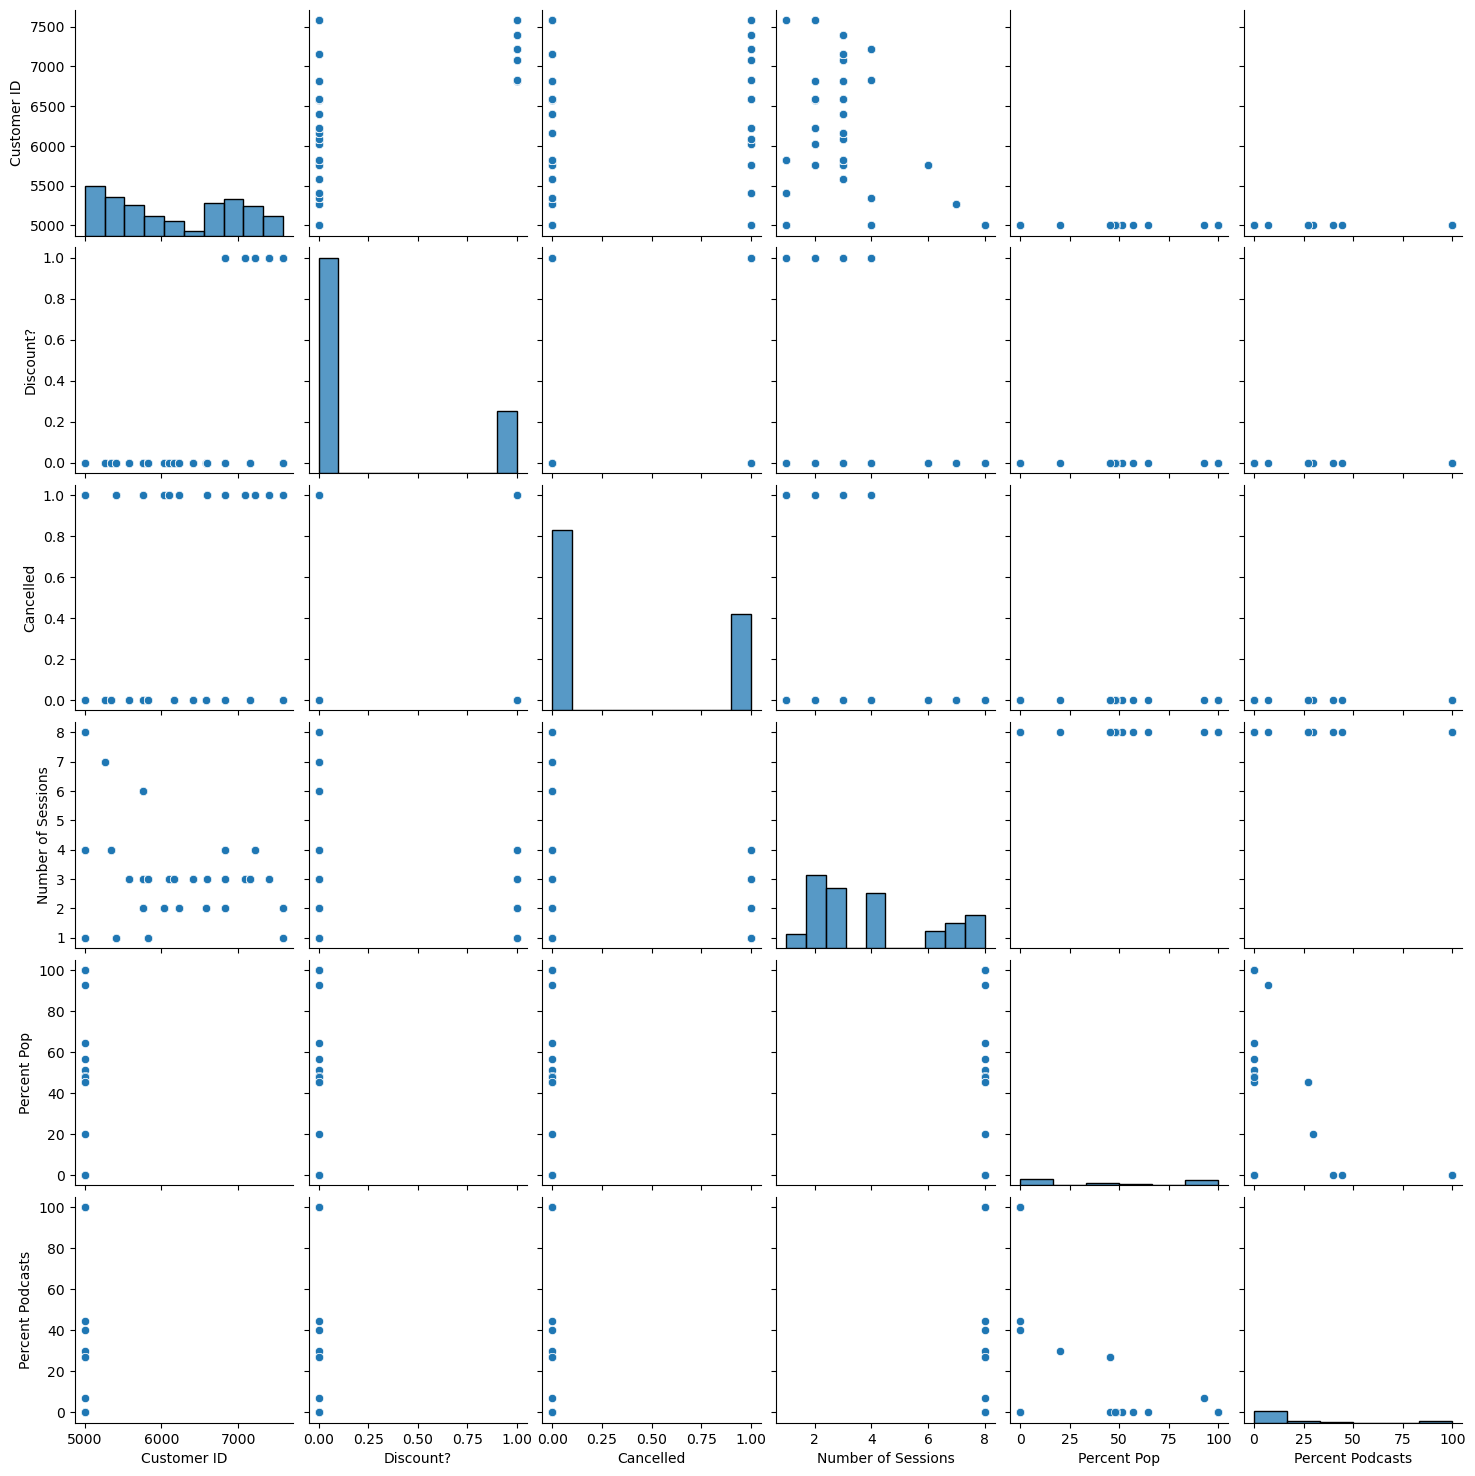

In [113]:
sns.pairplot(modelData)

In [114]:
# Look at the correlations
modelData.corr()

,Customer ID,Discount?,Cancelled,Number of Sessions,Percent Pop,Percent Podcasts
Customer ID,1.000000,0.647310,0.434325,-0.593601,NaN,NaN
Discount?,0.647310,1.000000,0.587513,-0.147552,NaN,NaN
Cancelled,0.434325,0.587513,1.000000,-0.386757,NaN,NaN
Number of Sessions,-0.593601,-0.147552,-0.386757,1.000000,NaN,NaN
Percent Pop,NaN,NaN,NaN,NaN,1.000000,-0.505858
Percent Podcasts,NaN,NaN,NaN,NaN,-0.505858,1.000000
